In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("Data-Collisions-2.csv")

/Users/AZ/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df1.drop(df1.columns.difference(['SEVERITYCODE','X','Y','PEDCOUNT','PEDCYLCOUNT']), 1, inplace=True)

In [5]:
df = pd.read_csv("zipinfacc.csv")

In [6]:
df1

,SEVERITYCODE,X,Y,PEDCOUNT,PEDCYLCOUNT
0,2,-122.323148,47.703140,0,0
1,1,-122.347294,47.647172,0,0
2,1,-122.334540,47.607871,0,0
3,1,-122.334803,47.604803,0,0
4,2,-122.306426,47.545739,0,0
...,...,...,...,...,...
194668,2,-122.290826,47.565408,0,0
194669,1,-122.344526,47.690924,0,0
194670,2,-122.306689,47.683047,0,0
194671,2,-122.355317,47.678734,0,1


In [7]:
df1.columns = ['SEVERITYCODE','lon','lat','PEDCOUNT','PEDCYLCOUNT']

In [8]:
df_merged = df.merge(df1, how='outer', left_index=True, right_index=True)

In [9]:
df_merged

,lat_x,lon_x,zipcode,SEVERITYCODE,lon_y,lat_y,PEDCOUNT,PEDCYLCOUNT
0,47.703140,-122.323148,98125.0,2,-122.323148,47.703140,0,0
1,47.647172,-122.347294,98102.0,1,-122.347294,47.647172,0,0
2,47.607871,-122.334540,98101.0,1,-122.334540,47.607871,0,0
3,47.604803,-122.334803,98104.0,1,-122.334803,47.604803,0,0
4,47.545739,-122.306426,98108.0,2,-122.306426,47.545739,0,0
...,...,...,...,...,...,...,...,...
194668,NaN,NaN,NaN,2,-122.290826,47.565408,0,0
194669,NaN,NaN,NaN,1,-122.344526,47.690924,0,0
194670,NaN,NaN,NaN,2,-122.306689,47.683047,0,0
194671,NaN,NaN,NaN,2,-122.355317,47.678734,0,1


In [10]:
df_merged.drop(df_merged.columns[[0,1,4,5]], axis=1, inplace=True)

In [11]:
df_merged20000 = df_merged.copy()

In [12]:
df_merged20000=df_merged20000.apply(pd.to_numeric, errors='ignore')

In [13]:
df_merged20000 = df_merged20000.dropna()

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_merged20000['zipcode'] = labelencoder.fit_transform(df_merged20000['zipcode'])

df_merged20000

,zipcode,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT
0,17,2,0,0
1,1,1,0,0
2,0,1,0,0
3,3,1,0,0
4,7,2,0,0
...,...,...,...,...
184162,22,1,0,0
184163,2,1,0,0
184164,10,2,0,0
184165,2,1,0,0


In [15]:
cols = df_merged20000.columns.tolist()

In [16]:
df_merged20000['SEVERITYCODE'].value_counts()

1    129416
2     54751
Name: SEVERITYCODE, dtype: int64

In [17]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_merged20000[df_merged20000.SEVERITYCODE==1]
df_minority = df_merged20000[df_merged20000.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=54751,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()


2    54751
1    54751
Name: SEVERITYCODE, dtype: int64

In [20]:
df_features=df_downsampled.drop(df_downsampled[['SEVERITYCODE']], axis=1)

In [21]:
X = np.asarray(df_features)
X.shape

(109502, 3)

In [22]:
df_downsampled['SEVERITYCODE'] = df_downsampled['SEVERITYCODE'].astype('int')
y = np.asarray(df_downsampled['SEVERITYCODE'])
y.shape

(109502,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SVM

In [45]:
clf = svm.SVC(kernel='rbf', C=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5843568786813388

#  KNN

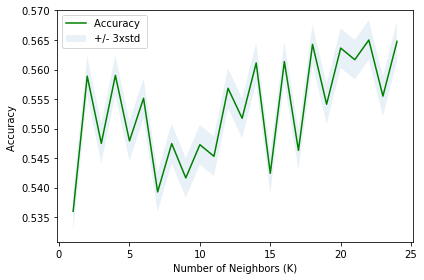

The best accuracy was with 0.5649970320989909 with k= 22


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [28]:
neigh = KNeighborsClassifier(n_neighbors = 22).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=22)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
loanTree.fit(X_train,y_train)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=8)

# Log Regression

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

LogisticRegression(C=0.01)

# Model Evaluation + Tests

In [31]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import itertools

### SVM

In [46]:
yhat_svm = clf.predict(X_test)

jaccard_svm = jaccard_score(y_test, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

f1_score_svm = f1_score(y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.5422177520744279
SVM F1-score:  0.5038993579220479


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10782   104]
 [ 8999  2016]]


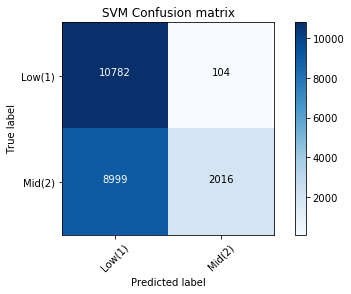

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(1)','Mid(2)'],normalize= False,  title='SVM Confusion matrix')

### KNN

In [35]:
yhat_knn = neigh.predict(X_test)

jaccard_knn = jaccard_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.4623285738472826
KNN F1-score:  0.5494225638022862


Confusion matrix, without normalization
[[8192 2694]
 [6833 4182]]


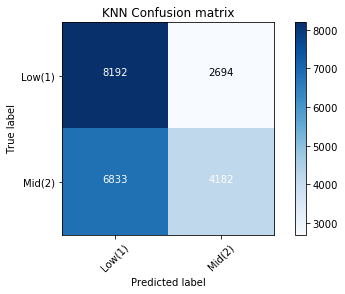

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(1)','Mid(2)'],normalize= False,  title='KNN Confusion matrix')

### DT

In [37]:
yhat_dt = loanTree.predict(X_test)

print (classification_report(y_test, yhat_dt))

jaccard_dt = jaccard_score(y_test, yhat_dt)
print("Decision Tree Jaccard index: ", jaccard_dt)

f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("Decision Tree F1-score: ", f1_score_dt)

              precision    recall  f1-score   support

           1       0.54      0.99      0.70     10886
           2       0.93      0.19      0.31     11015

    accuracy                           0.58     21901
   macro avg       0.74      0.59      0.51     21901
weighted avg       0.74      0.58      0.50     21901

Decision Tree Jaccard index:  0.5404847080163249
Decision Tree F1-score:  0.5049783761432444


Confusion matrix, without normalization
[[10727   159]
 [ 8961  2054]]


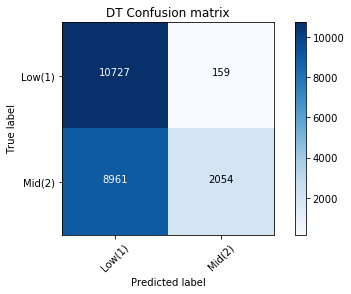

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_dt, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(1)','Mid(2)'],normalize= False,  title='DT Confusion matrix')

### LR

In [39]:
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)

jaccard_lg = jaccard_score(y_test, yhat_lg)
print("Logistic Regression Jaccard index: ", jaccard_lg)

f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("Logistic Regression F1-score: ", f1_score_lg)

logloss_lg = log_loss(y_test, yhat_lg_prob)
print("Logistic Regression log loss: ", logloss_lg)

Logistic Regression Jaccard index:  0.5422177520744279
Logistic Regression F1-score:  0.5038993579220479
Logistic Regression log loss:  0.6418184969424515


Confusion matrix, without normalization
[[10782   104]
 [ 8999  2016]]


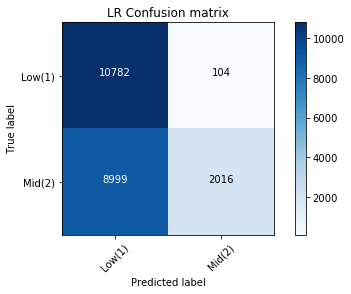

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lg, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(1)','Mid(2)'],normalize= False,  title='LR Confusion matrix')

In [41]:
print('true:', y_test[25:50])
print('pred:', yhat_lg[25:50])

true: [2 2 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2]
pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.482       | 0.569        | NA      |
| DT      | 0.515       | 0.556        | NA      |
| SVM                | 0.516       | 0.554        | NA      |
| LR | 0.485       | 0.548        | 0.629       |